In [26]:
import polars as pl
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns



In [9]:
df=pd.read_csv("./heart.csv")

In [10]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [16]:
df.nunique()

age               41
sex                2
BP                47
cholestrol       144
heart disease      2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [18]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((162, 4), (108, 4))

In [21]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

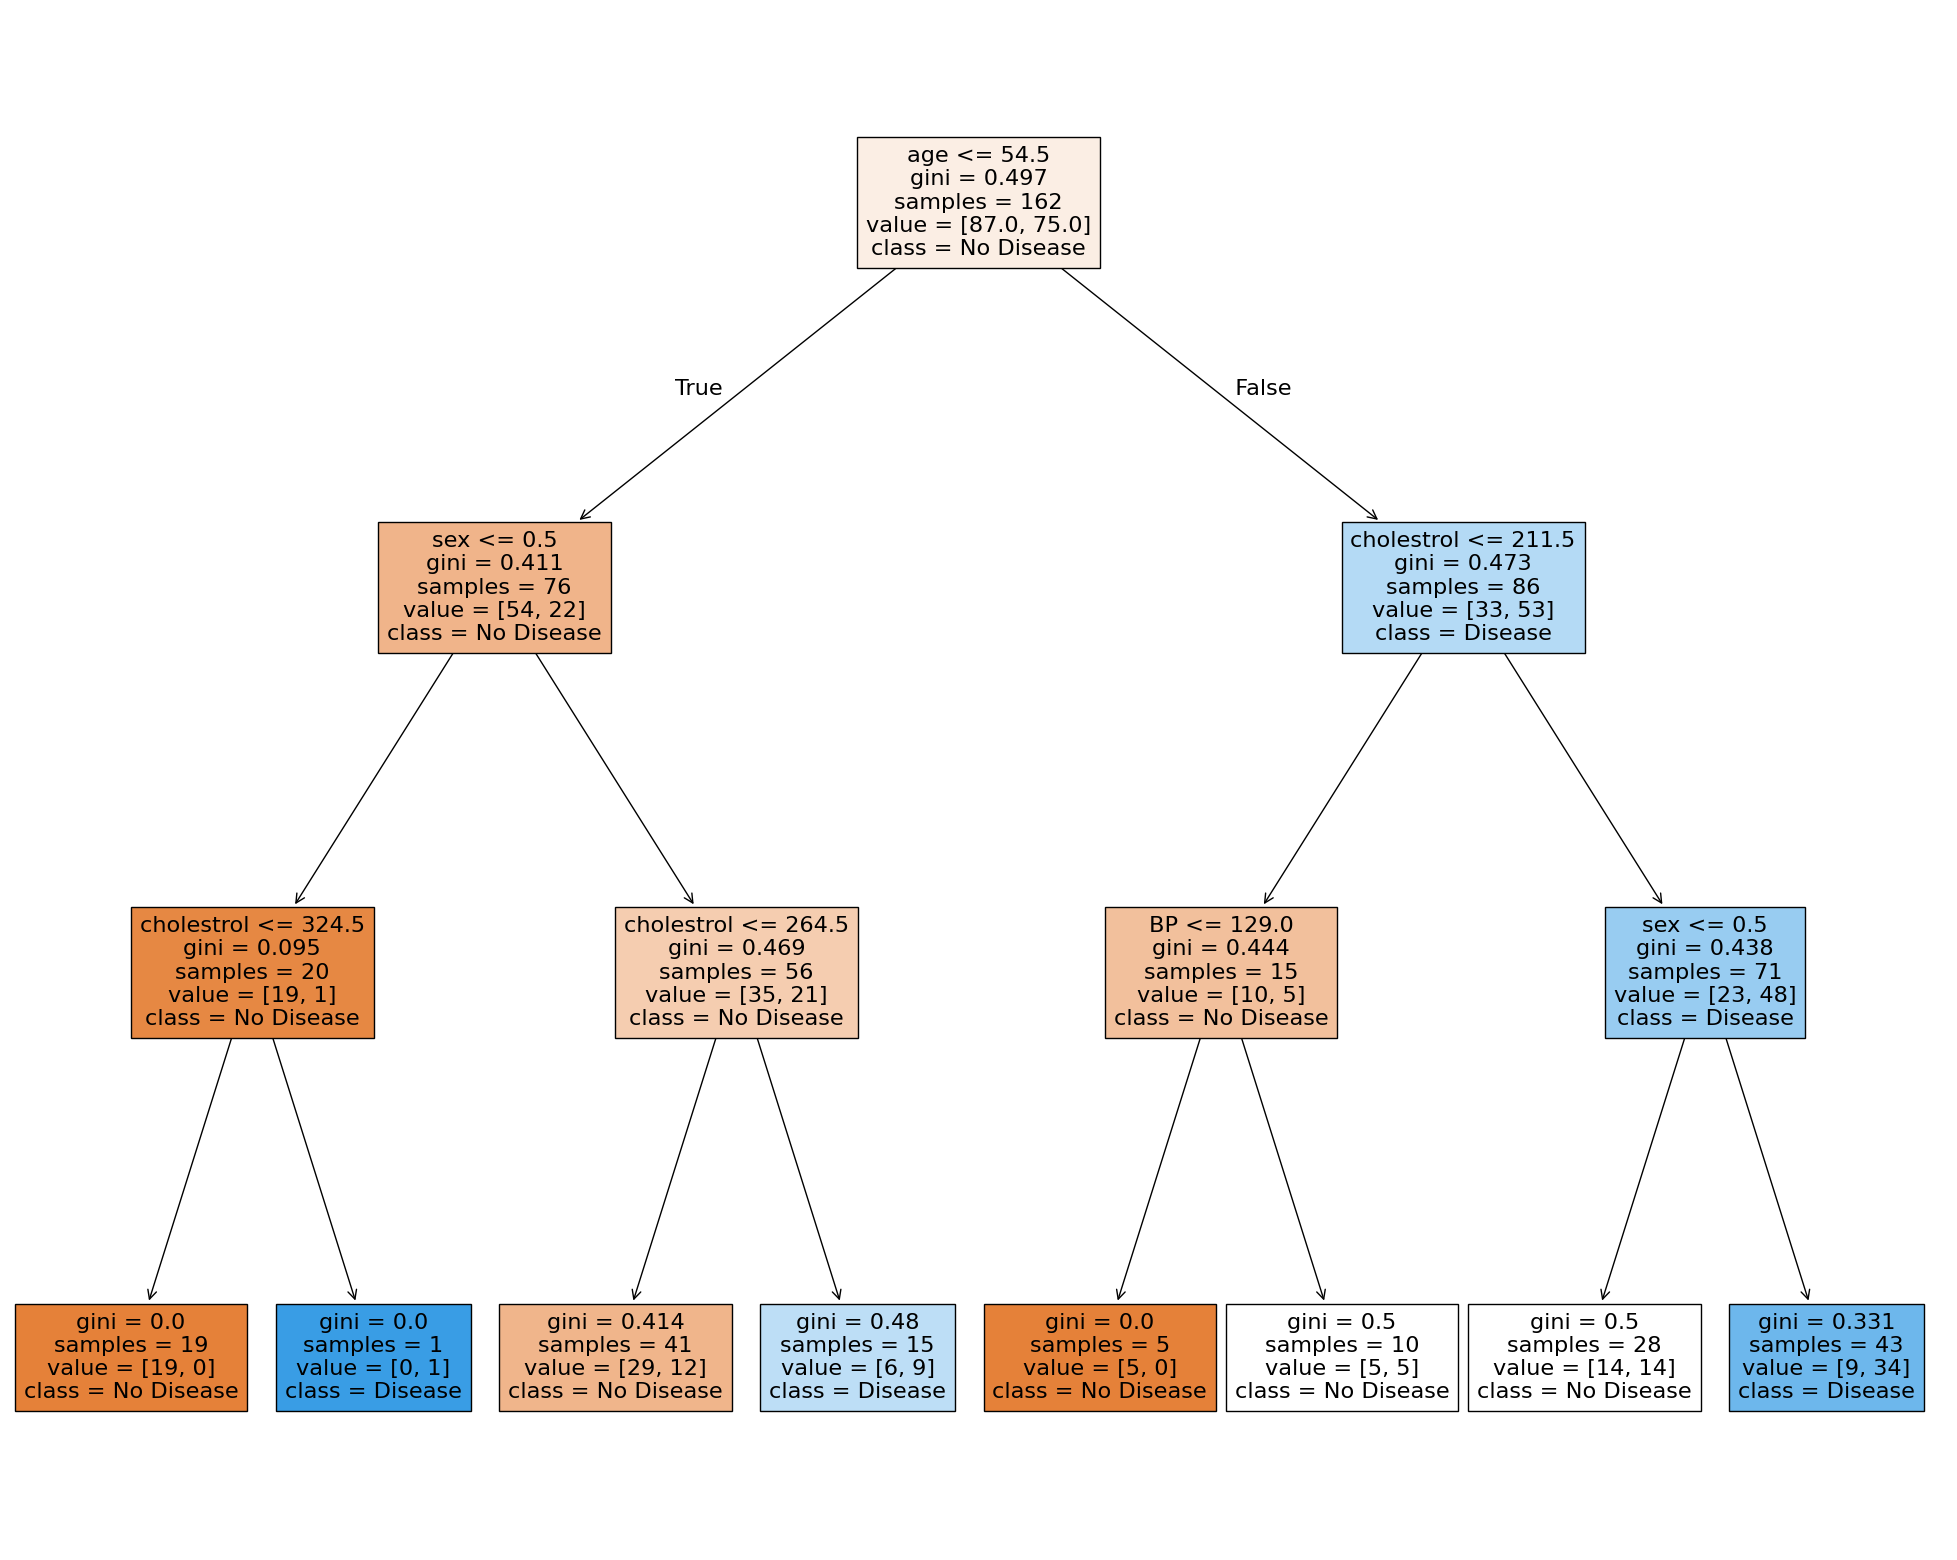

In [27]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

In [28]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7160493827160493


array([[72, 15],
       [31, 44]])

In [31]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7037037037037037


array([[51, 12],
       [20, 25]])

In [32]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [33]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [34]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

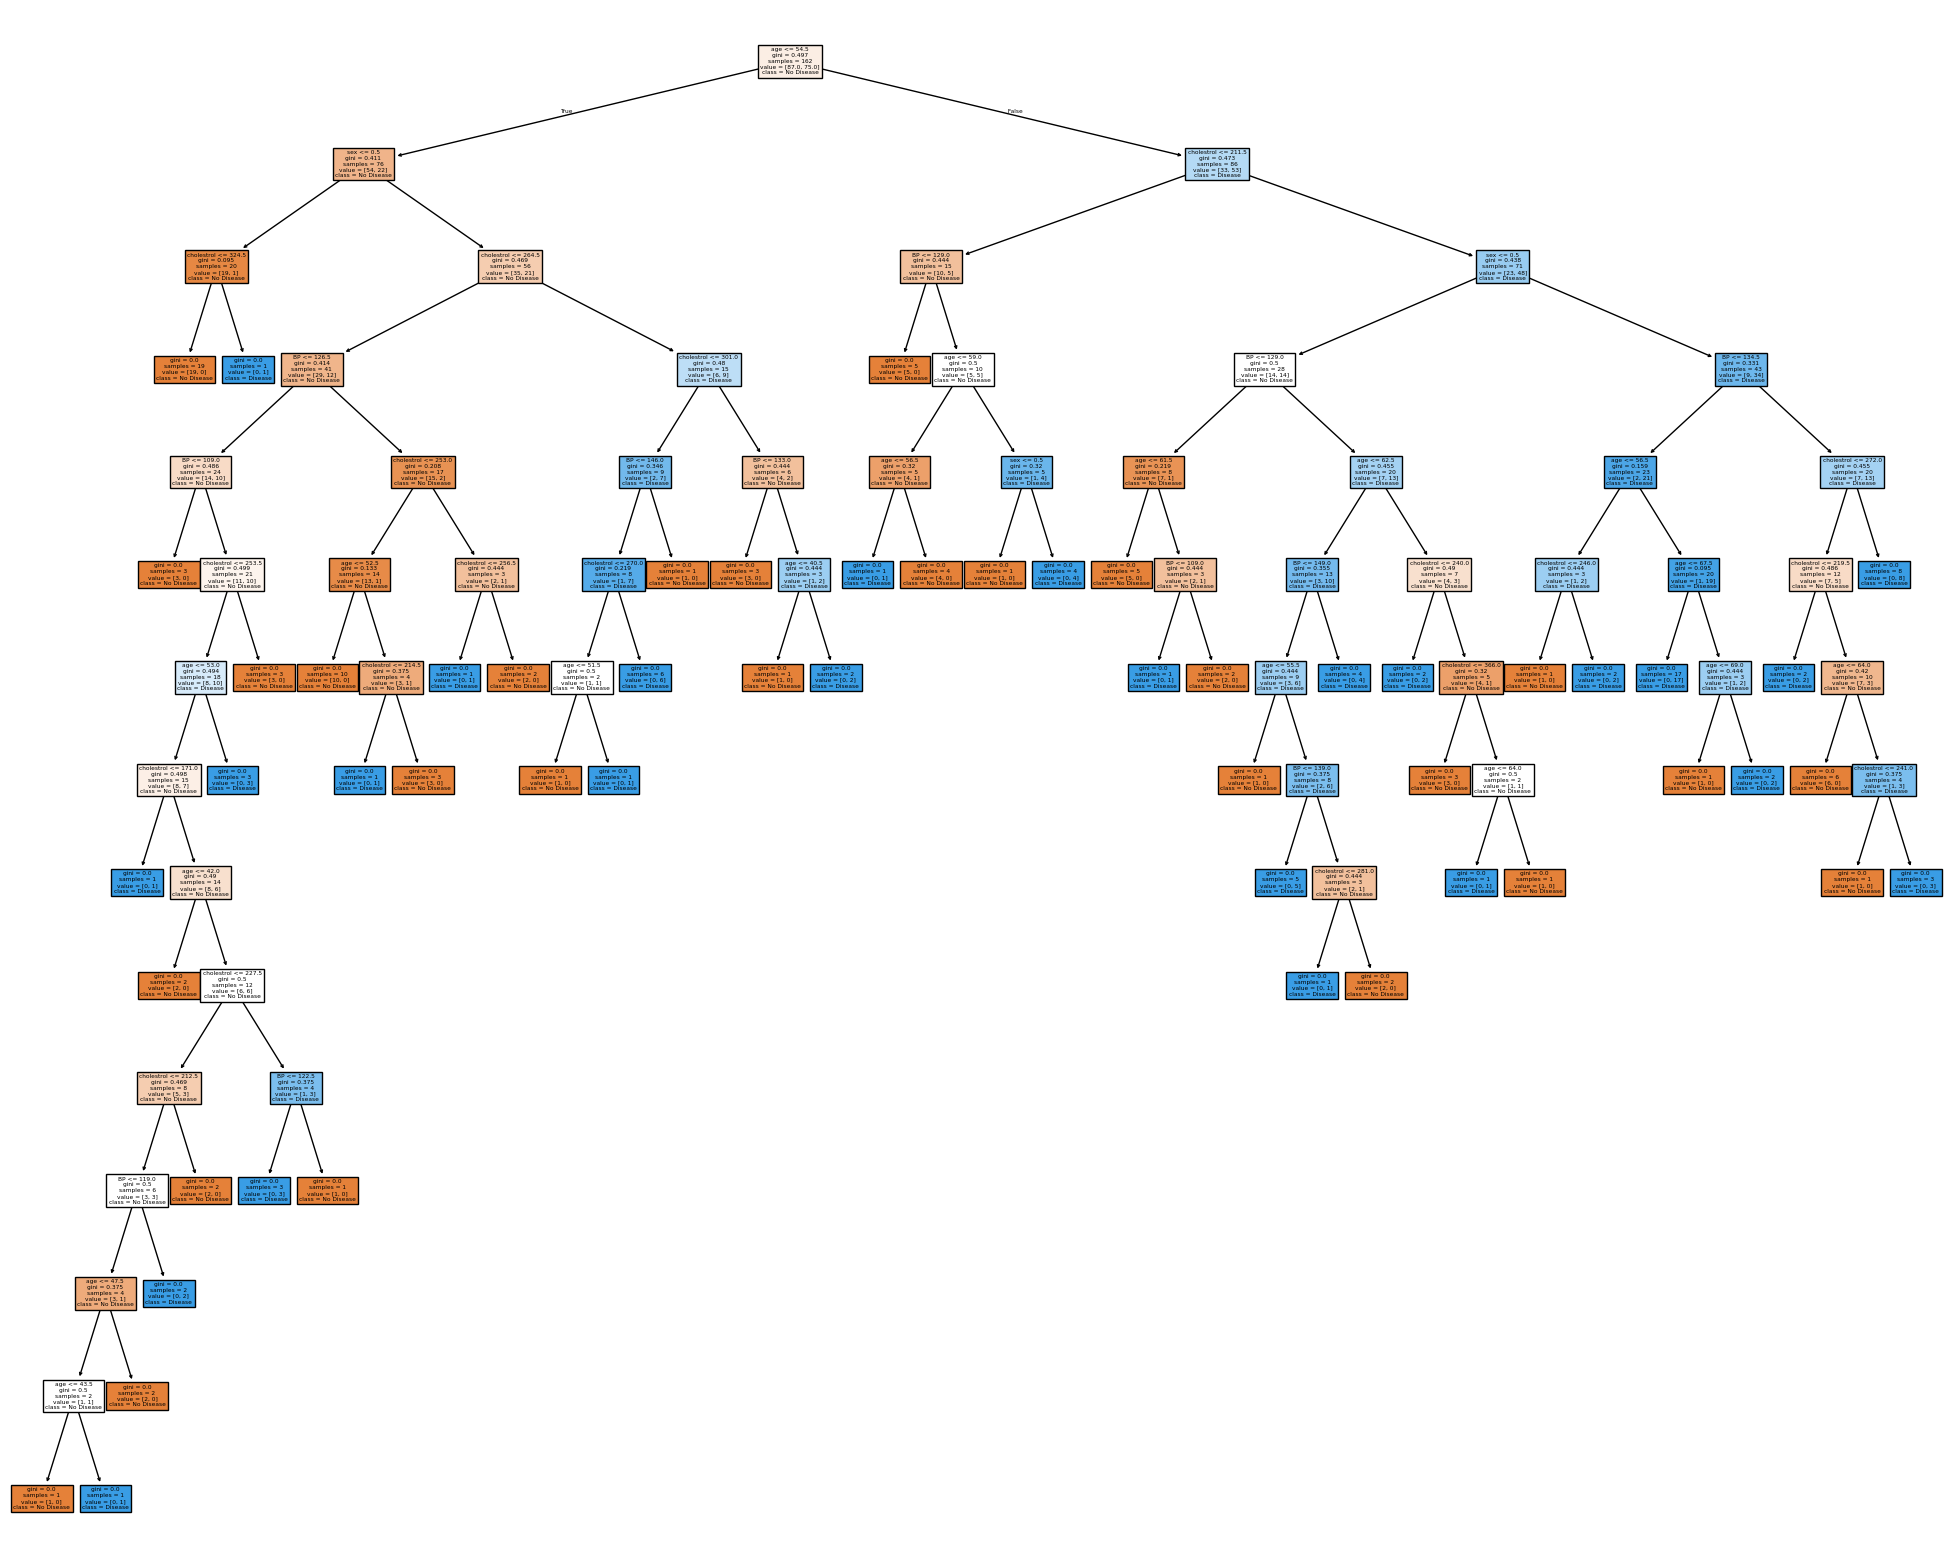

In [35]:
gph = get_dt_graph(dt_default)

In [36]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[87  0]
 [ 0 75]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[47 16]
 [16 29]]


In [37]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

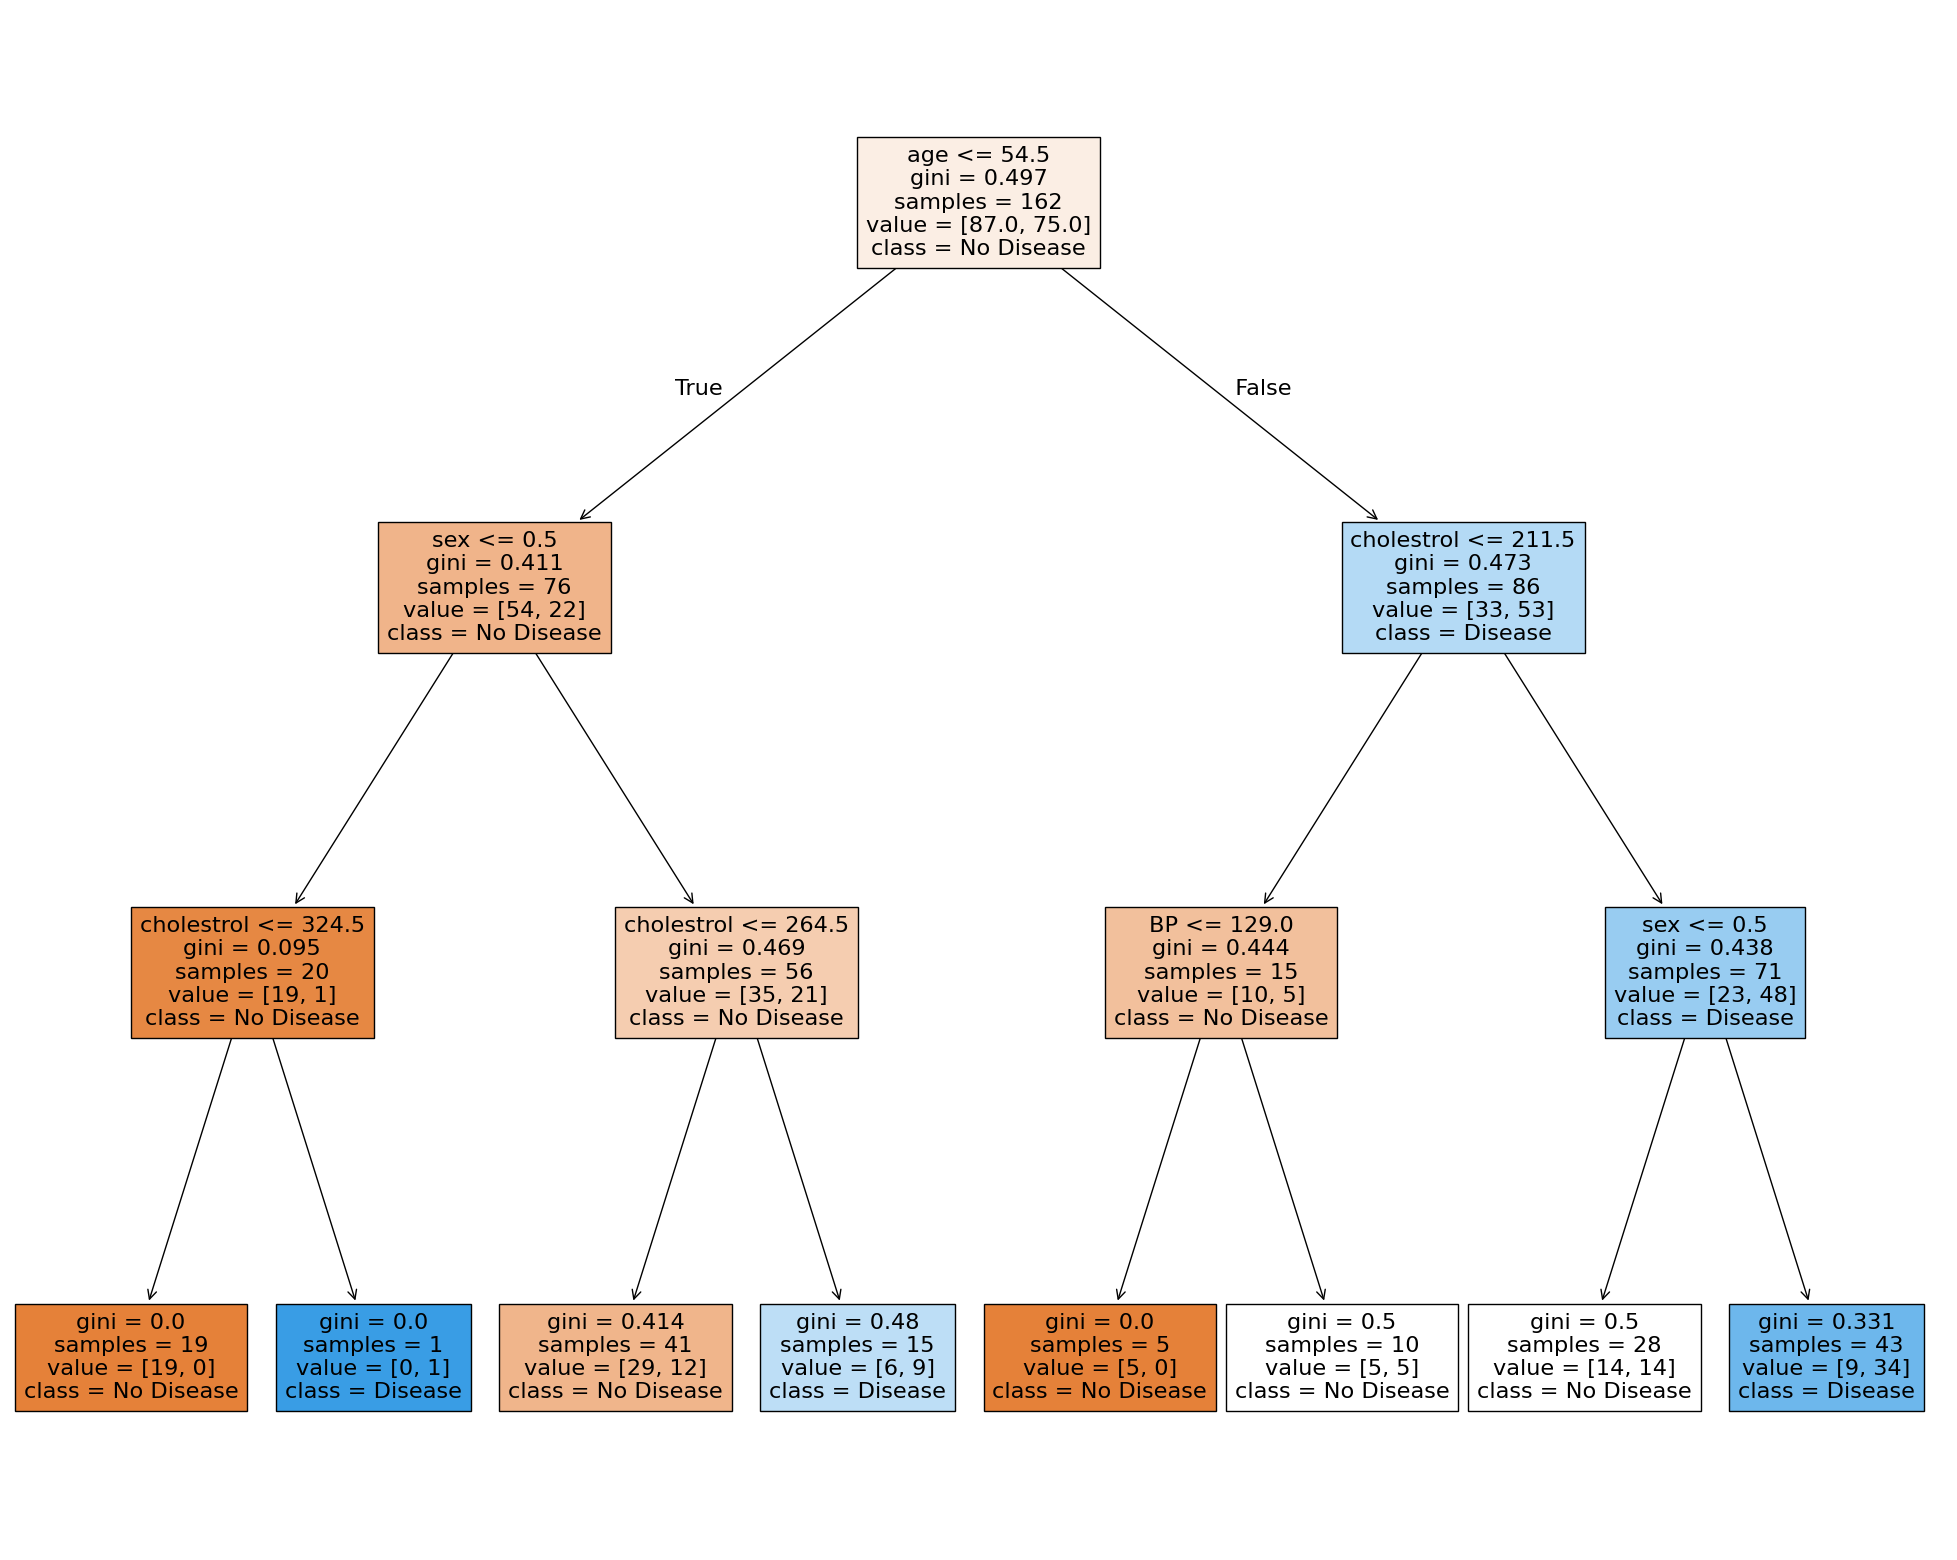

In [38]:
gph = get_dt_graph(dt_depth) 

In [39]:
evaluate_model(dt_depth)

Train Accuracy : 0.7160493827160493
Train Confusion Matrix:
[[72 15]
 [31 44]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[51 12]
 [20 25]]
